# Jacobi package examples

This package calculates a few orthogonal polynomials such as Jacobi polynomials $P_n^{\alpha,\beta}(x)$, Chebyshev polynomials of the first and second kinds, $T_n(x)$ and $U_n(x)$ and Legendre Polynomials $P_n(x) = P_n^{0,0}(x)$.

The polynomials can be calculated pointwise or a `Poly` structure can be obtained, which is basically made up of the polynomial coefficients.

The respective derivatives can also be calculated.

## Pointwise calculation of polynomials

In [2]:
using Jacobi

To calculate the Jacobi polynomial $P_5^{0.2, 0.1}(0.3)$:

In [4]:
x = 0.3
a = 0.2
b = 0.1
m = 5
jacobi(x, m, a, b)

0.3780304524166406

The derivative $\left.\frac{dP_5^{0.2, 0.1}(x)}{dx}\right|_{x=0.3}$:

In [5]:
djacobi(x, m, a, b)

-0.4343764194492186

The Legendre, Chebyshev (first and second kind) are calculated as follows:

In [6]:
y1 = legendre(x, m) # Legendre polynomial of degree m
y2 = chebyshev(x, m) # Chebyshev polynomial of first kind of degree m
y3 = chebyshev2(x, m) # Chebyshev polynomial of second kind of degree m
[y1, y2, y3]

3-element Array{Float64,1}:
 0.345386
 0.99888 
 1.01376 

Finally, the respective derivatives:

In [7]:
y1 = dlegendre(x, m) # Derivative of Legendre polynomial of degree m
y2 = dchebyshev(x, m) # Derivative of Chebyshev polynomial of first kind of degree m
y3 = dchebyshev2(x, m) # Derivative ofChebyshev polynomial of second kind of degree m
[y1, y2, y3]

3-element Array{Float64,1}:
 -0.168562
  0.248   
 -1.344   

## Polynomial coefficients

Sometimes it is useful to calculate the coefficients of the polynomials. The functions with prefix `poly_` return a Poly object available in the [package Polynomials](https://github.com/Keno/Polynomials.jl).

The naming follows the pointwise calculation of polynomials already described above.

In [8]:
using Polynomials

T5 = poly_chebyshev(5, Int, :x)

Poly(5x - 20x^3 + 16x^5)

In [10]:
T8 = poly_chebyshev(8, Float64, :y)

LoadError: Polynomials must have same variable
while loading In[10], in expression starting on line 1

In [12]:
T4 = poly_chebyshev(8)

Poly(1 - 32x^2 + 160x^4 - 256x^6 + 128x^8)

In [13]:
dT4dx = poly_dchebyshev(4)

Poly(-16x + 32x^3)

In [14]:
U5 = poly_chebyshev2(5)

Poly(6x - 32x^3 + 32x^5)

In [15]:
dU5dx = poly_dchebyshev2(5)

Poly(6 - 96x^2 + 160x^4)

In [16]:
P6 = poly_legendre(6) # Legendre Polynomial

Poly(-0.3125 + 6.5625x^2 - 19.6875x^4 + 14.4375x^6)

In [17]:
dP6 = polyder(P6)# Derivative using Polynomials Package
dp6b = poly_dlegendre(6)  # Syntatic sugar calling the above line.


Poly(13.125x - 78.75x^3 + 86.625x^5)

In [18]:
err = dP6 - dp6b  # Both procedures above should be the same!

Poly(0.0)

In [19]:
P7ab = poly_jacobi(7, a, b) # Jacobi polynomials

Poly(-0.024746232255859372 - 2.4416546568652344x + 0.5967953141894532x^2 + 22.727281485986328x^3 - 1.9930645195800785x^4 - 51.4035174487207x^5 + 1.5947440682714844x^6 + 32.57834310897459x^7)

In [20]:
dP7abdx = poly_djacobi(7, a, b)

Poly(-2.4416546568652344 + 1.1935906283789064x + 68.18184445795899x^2 - 7.972258078320314x^3 - 257.0175872436035x^4 + 9.568464409628906x^5 + 228.04840176282215x^6)

## Calculating the polynomials at several points

Often, it is necessary to calculate polynomials at several points. As syntatic sugar a few functions are available to make that easy:

In [21]:
using PyPlot # Seeing is believing ...

INFO: Loading help data...


In [22]:
x = linspace(-1.0, 1.0, 401);

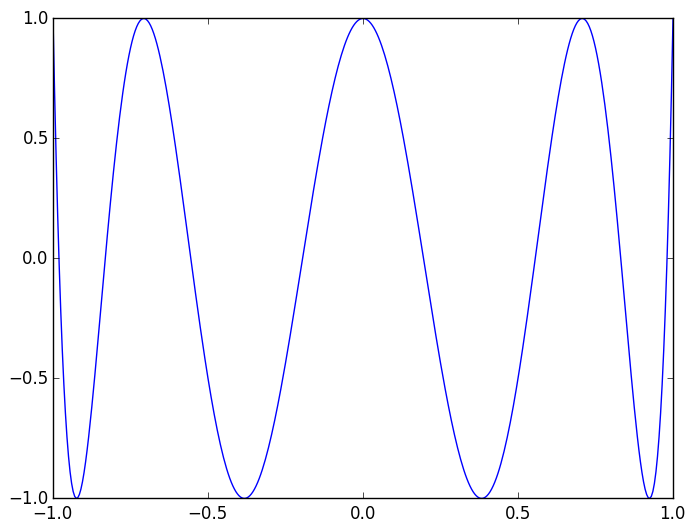

In [24]:
y1 = chebyshev(x, 8);
plot(x, y1);

There is the mutating function:

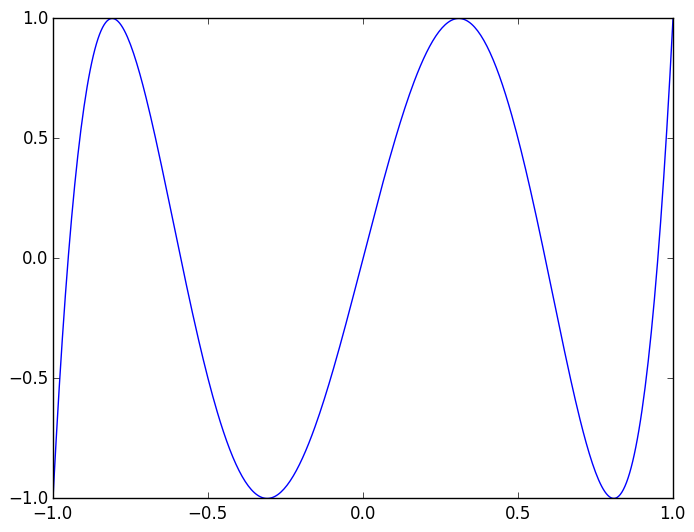

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f77b7133080>

In [27]:
y2 = zeros(x);
chebyshev!(x, 5, y2)
plot(x, y2)

The same thing is implemented for Jacobi and Legendre polynomials and their derivative:

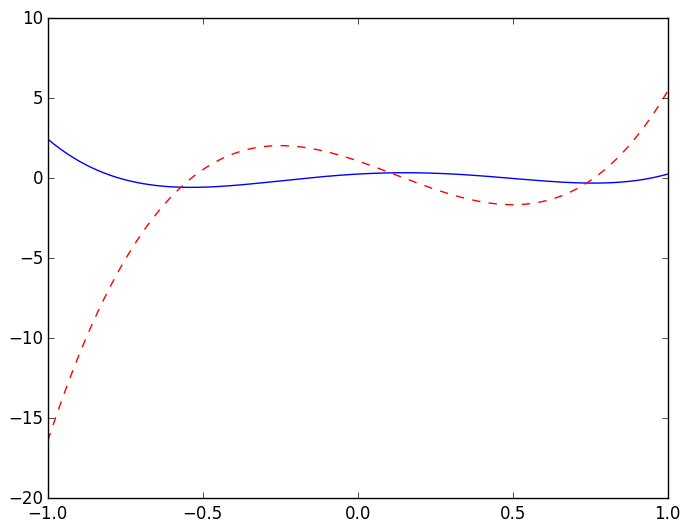

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f77b6f5fb00>
 PyObject <matplotlib.lines.Line2D object at 0x7f77b6f5fe48>

In [30]:
y3 = jacobi(x, 4, -0.5, 0.5)
y4 = djacobi(x, 4, -0.5, 0.5)
plot(x, y3, "b-", x, y4, "r--")

## Zeros of polynomials

oThe functions starting with suffix `_zero` calculate the zeros of the polynomials.

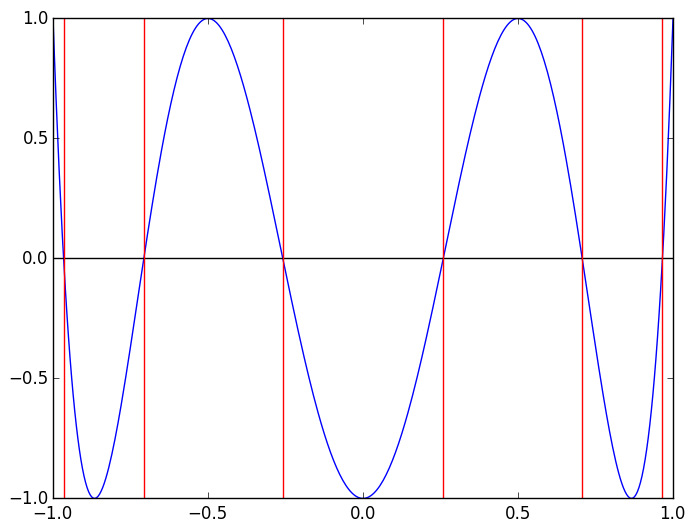

In [39]:
x = linspace(-1, 1, 401);
y = chebyshev(x, 6);
z = chebyshev_zeros(6)
plot(x, y)
axhline(y=0.0, color="black")
[axvline(x=zz, color="red") for zz in z];


Again there are mutating versions of this function:

In [42]:
z = zeros(5)
jacobi_zeros!(5, a, b, z)
z

5-element Array{Float64,1}:
 -0.899519 
 -0.537495 
 -0.0136203
  0.514423 
  0.887668 

## Types other than `Float64`

Most times, calculations will be carried out using `Float64` because that is the most useful datatype. Most functions can be used with other data types, including `Float32`, `BigFloat` and, except when calculating zeros of polynomials, `Rational{T}`.

In [43]:
jacobi(float32(0.5), 8, 0.5, 1.0)


-0.11098426440730691

In [44]:
chebyshev(23//47, 7)

214832820407//506623120463

In [45]:
djacobi(BigFloat(0.6), 10, 0.5, -0.5)

4.770638984160155424568808763332988903749347442526164591900368406181365041596503e+00 with 256 bits of precision

In [46]:
jacobi_zeros(7, 1, -1, BigFloat)

7-element Array{BigFloat,1}:
 -1e+00                                                                               
 -8.717401485096066153374457612206634381037806696769833549194152855738989940929645e-01
 -5.917001814331423021445107313979531899457009895173324967422595914701481800491344e-01
 -2.092992179024788687686572603453512552955454050866810988908466923221309236462841e-01
  2.092992179024788687686572603453512552955454050866810988908466923221309236462841e-01
  5.917001814331423021445107313979531899457009895173324967422595914701481800491344e-01
  8.717401485096066153374457612206634381037806696769833549194152855738989940929645e-01